In [ ]:
import os, sys

os.getcwd()

In [ ]:
# Import libraries and dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = "sectors" # Values: asset_class, sectors, ftse

quant_res_df = pd.read_csv("ResultCSVs/grphcolor_quant_%s_res.csv" % (dataset))
class_res_df = pd.read_csv("ResultCSVs/grphcolor_class_%s_res.csv" % (dataset))

quant_res_df = quant_res_df.drop(axis=1, columns=['Unnamed: 0'])
class_res_df = class_res_df.drop(axis=1, columns=['Unnamed: 0'])

In [ ]:
quant_res_df.shape

In [ ]:
quant_res_df.columns

In [ ]:
# Plot graph density for each threshold. 

thresh_array = quant_res_df['threshold'].unique()

density_distr = []

for thresh in thresh_array:
    density = quant_res_df[quant_res_df.threshold == thresh]['density']
    density_distr.append(density)
    
plt.boxplot(density_distr, labels=[float('%.2f'%x) for x in thresh_array])
plt.ylabel("Graph Density")
plt.xlabel("Correlation Threshold")
plt.title("%s Density vs Threshold" % (dataset))
plt.show()

In [ ]:
[float('%.2f'%x) for x in thresh_array]

In [ ]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & (quant_res_df.valid_coloring == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & (class_res_df.valid_coloring == True)]
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    assert quant_series.shape == class_series.shape
    
    fig = plt.figure(i)
    plt.subplots_adjust(wspace=1)
    plt.subplots(figsize=(15,5))
    
    plt.subplot(121)
    plt.title('Min. Grph Color vs Time, %s, thresh = %f' % (dataset, thresh))
    plt.ylabel('Num. Colors')
    plt.xlabel('Date')
    
    plt.plot(quant_series['num_colors'], 'r--', label='Quant Alg')
    plt.plot(class_series['num_colors'], 'b--', label='Class Alg')
    plt.legend(loc=0)
    
    plt.subplot(122)
    plt.title('%s Graph Density vs Time, thresh=%f' % (dataset, thresh))
    plt.plot(quant_series['date'], quant_series['density'], '--')
    
    plt.savefig('../ReportFiguresPlots/GraphColor/%s_score_density_time_thresh_%f.png' % (dataset, thresh))
    
    i += 1

In [23]:
datasets = ["sectors", "ftse", "asset_class"]

quant_dfs = []
class_dfs = []

for d in datasets:
    qdf = pd.read_csv("ResultCSVs/grphcolor_quant_%s_res.csv" % (d))
    cdf = pd.read_csv("ResultCSVs/grphcolor_class_%s_res.csv" % (d))
    
    quant_dfs.append(qdf)
    class_dfs.append(cdf)

all_quant_df = pd.concat(quant_dfs)
all_class_df = pd.concat(class_dfs)

In [ ]:
assert all_class_df.date.equals(all_quant_df.date)

In [27]:
all_quant_df = all_quant_df.groupby(["density"])["num_colors"].mean()

In [31]:
all_class_df = all_class_df.groupby(['density'])['num_colors'].mean()

In [ ]:
quant_scores = []
quant_density = all_quant_df.density.unique()

class_scores = []
class_density = quant_density

for density in all_quant_df.density.unique():
    qdf = all_quant_df[all_quant_df.density == density]
    cdf = all_class_df[all_class_df.density == density]
    
    qscore = qdf.num_colors.sum()/(qdf.shape[0])
    cscore = cdf.num_colors.sum()/(cdf.shape[0])
    
    quant_scores.append(qscore)
    class_scores.append(cscore)

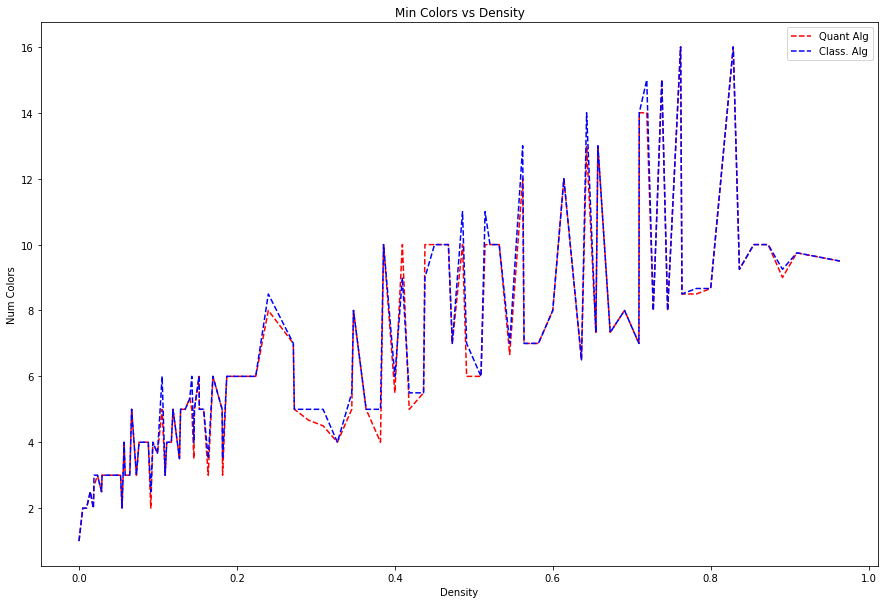

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(1, figsize=(15,10))
plt.plot(all_quant_df, 'r--', label='Quant Alg')
plt.plot(all_class_df, 'b--', label='Class. Alg')
plt.title("Min Colors vs Density")
plt.ylabel("Num Colors")
plt.xlabel("Density")
plt.legend(loc=0)
plt.show()
plt.savefig("../ReportFiguresPlots/mincolor_density_all.png")